In [186]:
import numpy as np
import matplotlib.pyplot as plt
import numba

<h1>Implementación del algoritmo de Gillespie en Hemoglobina</h1>
Para esta simulación, se mide el tiempo que le toma a una hemoglobina llenarse completamente en medio de distintas situaciones
en donde las probabilidades de que una molécula se pegue se hace por medio del algoritmo de Gillespie. <br>

<b>Autores:</b> Juan Esteban Sandoval y Laura Zamudio Chávez

In [187]:
#Constantes importantes
kO2 = 0.001 #Estimado
kCO = 200*kO2 #Tomado de la literatura
its = 100000 #Iteraciones totales para esta simulación
itsG = 100 #Iteraciones del método de gillespie (son 10 ya que converge rápido)

<h2>Situación 1: Medio con CO abundante</h2>
En este, la probabilidad de que se pegue un O2 a la hemoglobina es muy alta, pero aún así la afinidad del CO sigue siendo muy alta en caso de que se encuentre.

In [188]:
def gillespieS1(tmax):
    h = 0 #Hemoglobinas
    t = np.zeros(tmax)
    
    for i in range(tmax-1):
        s1 = kO2*(1+h) #Esto modela el incremento de la afinidad según el pegado de O2
        s2 = kCO*(1+h) #Esto modela el incremento de la afinidad según el pegado de CO
        st = s1+s2
    
        #Generación del paso temporal 
        t[i+1] = t[i]+(-1/st)*np.log(np.random.rand())
        
        #Número aleatorio que corresponde al medio: Mucho O2 implica desviación proporcional a s1
        m = np.random.normal(loc = s1,scale = s1/10000)
        
        #Caso en el que se pega una molécula de O2
        if m <= (s1/st):
            h += 1
        
        #En el caso en el que se pegue una molécula de CO, se modela como si no se hubiera pegado nada
        elif m <= (s1+s2)/st:
            h += 0
            
        if h == 4:
            break
                 
    return max(t)

tO2 = [] #Tiempos de llenado para este medio

for i in range(its):
    tO2.append(gillespieS1(itsG))

<h2>Situación 2: Medio con O2 abundante</h2>
En este, la probabilidad de que se pegue un O2 a la hemoglobina es más alta, por lo que el número aleatorio tiene una desviación estándar más grande.

In [189]:
def gillespieS2(tmax):
    h = 0 #Hemoglobinas
    t = np.zeros(tmax)
    
    for i in range(tmax-1):
        s1 = kO2*(1+h) #Esto modela el incremento de la afinidad según el pegado de O2
        s2 = kCO*(1+h) #Esto modela el incremento de la afinidad según el pegado de CO
        st = s1+s2
    
        #Generación del paso temporal 
        t[i+1] = t[i]+(-1/st)*np.log(np.random.rand())
        
        #Número aleatorio que corresponde al medio: Mucho CO implica desviación proporcional a s2
        m = np.random.normal(loc = s2 ,scale = s2/10000)
        
        #Caso en el que se pega una molécula de O2
        if m <= (s1/st):
            h += 1
        
        #En el caso en el que se pegue una molécula de CO, se modela como si no se hubiera pegado nada
        elif m <= (s1+s2)/st:
            h += 0
            
        if h == 4:
            break
                 
    return max(t)

tCO = [] #Tiempos de llenado para este medio

for i in range(its):
    tCO.append(gillespieS2(itsG))

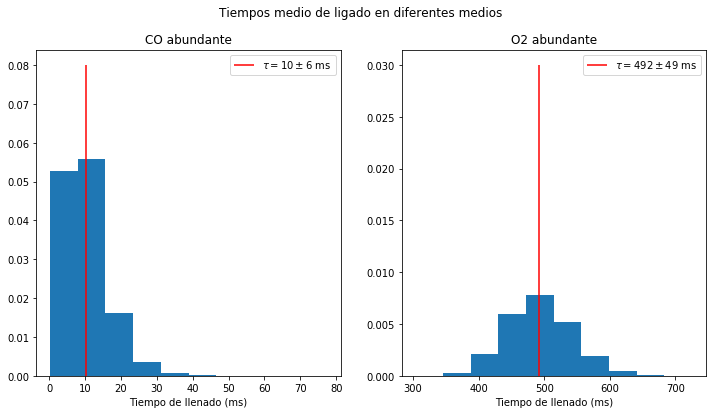

In [202]:
#Graficando 
plt.figure(figsize=(12,6))
plt.suptitle("Tiempos medio de ligado en diferentes medios")

plt.subplot(121)
plt.title("CO abundante")
plt.hist(tO2,density=True)
plt.vlines(np.mean(tO2),0,0.08,color="red",label="$\\tau = {:.0f} \pm {:.0f} $ ms".format(np.mean(tO2),np.std(tO2)))
plt.xlabel("Tiempo de llenado (ms)")
plt.legend()

plt.subplot(122)
plt.title("O2 abundante")
plt.hist(tCO,density=True)
plt.vlines(np.mean(tCO),0,0.03,color="red",label="$\\tau = {:.0f} \pm {:.0f} $ ms".format(np.mean(tCO),np.std(tCO)))
plt.xlabel("Tiempo de llenado (ms)")
plt.legend()
plt.savefig("tmedios.png")

<h2>Situación 3: Medio con CO abundante pero con O2 pegados desde el inicio</h2>

In [191]:
def gillespieS3(tmax,CO0):
    h = 0 #Hemoglobinas
    t = np.zeros(tmax)
    
    for i in range(tmax-1):
        s1 = kO2*(1+h) #Esto modela el incremento de la afinidad según el pegado de O2
        s2 = kCO*(1+CO0+h) #Esto modela el incremento de la afinidad según el pegado de CO
        st = s1+s2
    
        #Generación del paso temporal 
        t[i+1] = t[i]+(-1/st)*np.log(np.random.rand())
        
        #Número aleatorio que corresponde al medio: Mucho O2 implica desviación proporcional a s1
        m = np.random.normal(loc = s1,scale = s1/10000)
        
        #Caso en el que se pega una molécula de O2
        if m <= (s1/st):
            h += 1
        
        #En el caso en el que se pegue una molécula de CO, se modela como si no se hubiera pegado nada
        elif m <= (s1+s2)/st:
            h += 0
            
        if h + CO0== 4:
            break
                 
    return max(t)

tO2_1 = [] 
tO2_2 = [] 
tO2_3 = [] 
COs = [1,2,3] #Lista que contiene la cantidad de O2 que se pegan (también se usa esta lista para la cantidad de CO's)

for i in range(its):
    tO2_1.append(gillespieS3(itsG,COs[0]))
    tO2_2.append(gillespieS3(itsG,COs[1]))
    tO2_3.append(gillespieS3(itsG,COs[2]))

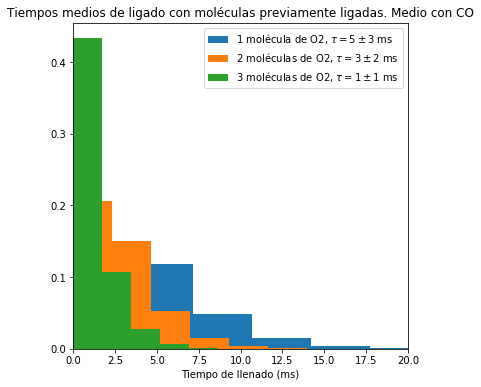

In [203]:
#Graficando 
plt.figure(figsize=(6,6))
plt.title("Tiempos medios de ligado con moléculas previamente ligadas. Medio con CO")

plt.hist(tO2_1,density=True,label="1 molécula de O2, $\\tau = {:.0f} \pm {:.0f}$ ms".format(np.mean(tO2_1),np.std(tO2_1)))

plt.hist(tO2_2,density=True,label="2 moléculas de O2, $\\tau = {:.0f} \pm {:.0f}$ ms".format(np.mean(tO2_2),np.std(tO2_2)))

plt.hist(tO2_3,density=True,label="3 moléculas de O2, $\\tau = {:.0f} \pm {:.0f}$ ms".format(np.mean(tO2_3),np.std(tO2_3)))

plt.xlabel("Tiempo de llenado (ms)")
plt.xlim(0,20)
plt.legend()
plt.savefig("ligadoCO.png")

<h2>Situación 4: Medio con O2 abundante pero con CO pegados desde el inicio</h2>

In [194]:
def gillespieS4(tmax,O20):
    h = 0 #Hemoglobinas
    t = np.zeros(tmax)
    
    for i in range(tmax-1):
        s1 = kO2*(1+O20+h) #Esto modela el incremento de la afinidad según el pegado de O2
        s2 = kCO*(1+h) #Esto modela el incremento de la afinidad según el pegado de CO
        st = s1+s2
    
        #Generación del paso temporal 
        t[i+1] = t[i]+(-1/st)*np.log(np.random.rand())
        
        #Número aleatorio que corresponde al medio: Mucho CO implica desviación proporcional a s2
        m = np.random.normal(loc = s2 ,scale = s2/10000)
        
        #Caso en el que se pega una molécula de O2
        if m <= (s1/st):
            h += 1
        
        #En el caso en el que se pegue una molécula de CO, se modela como si no se hubiera pegado nada
        elif m <= (s1+s2)/st:
            h += 0
            
        if h == 4:
            break
                 
    return max(t)

tCO_1 = [] 
tCO_2 = [] 
tCO_3 = []

for i in range(its):
    tCO_1.append(gillespieS4(itsG,COs[0]))
    tCO_2.append(gillespieS4(itsG,COs[1]))
    tCO_3.append(gillespieS4(itsG,COs[2]))

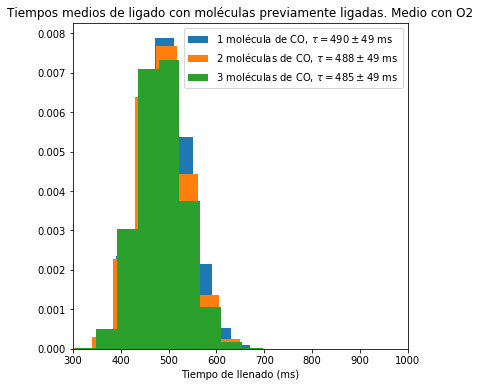

In [204]:
#Graficando 
plt.figure(figsize=(6,6))
plt.title("Tiempos medios de ligado con moléculas previamente ligadas. Medio con O2")

plt.hist(tCO_1,density=True,label="1 molécula de CO, $\\tau = {:.0f} \pm {:.0f}$ ms".format(np.mean(tCO_1),np.std(tCO_1)))

plt.hist(tCO_2,density=True,label="2 moléculas de CO, $\\tau = {:.0f} \pm {:.0f}$ ms".format(np.mean(tCO_2),np.std(tCO_2)))

plt.hist(tCO_3,density=True,label="3 moléculas de CO, $\\tau = {:.0f} \pm {:.0f}$ ms".format(np.mean(tCO_3),np.std(tCO_3)))

plt.xlabel("Tiempo de llenado (ms)")
plt.xlim(300,1000)
plt.legend()
plt.savefig("ligadoO2.png")